<a href="https://colab.research.google.com/github/pauljainta/CNN-backpropagation/blob/main/CNN_Backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as plt
import math


**LOAD DATA**

In [40]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = datasets.mnist.load_data()

In [41]:
# y_train_mnist = y_train_mnist.reshape(-1 , 1)
# y_test_mnist = y_test_mnist.reshape(-1 , 1)


print(x_train_mnist.shape)
print(y_train_mnist.shape)
print(y_test_mnist.shape)


(60000, 28, 28)
(60000,)
(10000,)


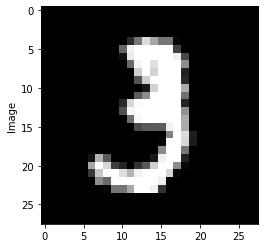

In [42]:
plt.ylabel("Image")
plt.imshow(x_train_mnist[10, :], cmap='gray')

In [43]:
type(x_train_mnist)

numpy.ndarray

In [44]:
x_train_mnist = x_train_mnist[ :,np.newaxis]
print(x_train_mnist.shape)



(60000, 1, 28, 28)


In [45]:
x_test_mnist = x_test_mnist[ :,np.newaxis]
print(x_test_mnist.shape)
print(y_test_mnist.shape)
size_of_each_batch = 32

(10000, 1, 28, 28)
(10000,)


In [46]:
def Batch_Creation(x , y):
  
    global size_of_each_batch

    total_number_of_batches = int(math.floor(y.shape[0] / size_of_each_batch))
    list_of_mini_batches = []

    for i in range(total_number_of_batches):
      if y.shape[0] % size_of_each_batch != 0 and i == total_number_of_batches-1 :
        list_of_mini_batches.append((x[i*size_of_each_batch:, :] , y[i*size_of_each_batch:] ))

      list_of_mini_batches.append((x[i*size_of_each_batch:(i+1)*size_of_each_batch , :] , y[i*size_of_each_batch:(i+1)*size_of_each_batch]))
   
    return list_of_mini_batches


In [47]:
size_of_each_batch = 128
batches = Batch_Creation(x_train_mnist , y_train_mnist)
print(len(batches))
print(batches[0][1].shape)

469
(128,)


In [48]:
def zero_padding(x , padding):
  return np.pad(x, ((0, 0), (0, 0), (padding, padding), (padding, padding)), mode='constant')

In [49]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_padding(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 3, 7, 6)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.90085595 -0.68372786  0.          0.        ]
 [ 0.          0.         -0.12289023 -0.93576943  0.          0.        ]
 [ 0.          0.         -0.26788808  0.53035547  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]


In [60]:
def convolutional_layer_forward(stride , padding , w , b , x):

    padded_x = zero_padding(x , padding)

    N = x.shape[0]
    C = x.shape[1]
    H = x.shape[2]
    W = x.shape[3]

    F = w.shape[0]
    FH = w.shape[2]
    FW = w.shape[3]

    W2 = int((W - FW + 2*padding)/stride + 1)
    H2 = int((H - FH + 2*padding)/stride + 1)

    all_selected_column_x = np.zeros((C * FH * FW, H2 * W2))
    all_selected_row_w = w.reshape(F, C * FH * FW)

    output = np.zeros((N, F, H2, W2))


    for i in range(N):
        column = 0
        for j in range(0, padded_x.shape[2] + 1 - FH, stride):
            for k in range(0, padded_x.shape[3]  + 1 - FW, stride):
                temp = padded_x[i, :, j:j+FH, k:k+FW]
                all_selected_column_x[:, column] = temp.reshape(C * FH * FW)
                column += 1
        
        current_unit_output = np.dot(all_selected_row_w, all_selected_column_x) + (b.reshape(-1, 1))
        output[i, :, :, :] = current_unit_output.reshape(F, H2, W2)

  
    return output, (stride, padding , w , x , b)


In [64]:
w1 = np.random.normal(0.0, 0.01, (6, 1, 5, 5))
b1 = np.zeros((6, ))

out1 , cache1 = convolutional_layer_forward(1 , 2 , w1 , b1 , batches[0][0])

print(out1.shape)

(128, 6, 28, 28)


In [63]:
def relu_forward(x):
  return np.maximum(0 , x) , x

In [65]:
out2 , cache2 = relu_forward(out1)

print(out2[0])

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.      

In [62]:
def pooling_layer_forward(stride , filter_dimension , x):
  N = x.shape[0]
  C = x.shape[1]
  H = x.shape[2]
  W = x.shape[3]

  H2 = math.floor((H - filter_dimension) / stride) + 1
  W2 = math.floor((W - filter_dimension) / stride) + 1

  output = np.zeros((N, C, H2, W2))

  for i in range(N):
      current_unit_output = np.zeros((C, H2* W2))
      column = 0
      for j in range(0, H - filter_dimension + 1, stride):
          for k in range(0, W - filter_dimension + 1, stride):
              selected_block_of_x = x[i, :, j:j+filter_dimension, k:k+filter_dimension]
              selected_block_of_x = selected_block_of_x.reshape(C, filter_dimension ** 2)

              max_value_from_current_block = np.max(selected_block_of_x, axis=1)
              current_unit_output[:, column] = max_value_from_current_block

              column += 1
              
      output[i, :, :, :] = current_unit_output.reshape(C, H2 , W2)

  return output, (filter_dimension , stride , x) 


In [67]:
out3 , cache3 = pooling_layer_forward(2 , 2 , out2)

print(out3.shape)
print(out3[0])

(128, 6, 14, 14)
[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 5.5130937  1.8646669  0.        ]
  [0.         0.         0.         ... 4.55167822 2.84220029 0.        ]
  ...
  [0.         0.13640949 0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 6.30045751 0.         0.        ]
  ...
  [0.         0.0165649  5.63696501 ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.